# **Step 1: T-Test — Compare Parameters for Fault vs. No Fault**
-  Interpretation:

- If p < 0.05, the difference is statistically significant.

- These parameters may be useful for prediction.

In [1]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('mechanical_machine_fault_data.csv')
df.head()

# Separate data
faulty = df[df['Fault'] == 1]
healthy = df[df['Fault'] == 0]

# Variables to test
features = ['Temperature_C', 'Vibration_mm_s', 'Oil_Quality_Index', 'RPM', 'Pressure_bar','Shaft_Misalignment_deg','Noise_dB','Load_%', 'Power_kW']

# T-Test
for feature in features:
    t_stat, p_value = ttest_ind(faulty[feature], healthy[feature], equal_var=False)
    print(f"{feature}: t-stat = {t_stat:.2f}, p = {p_value:.4f}")

Temperature_C: t-stat = 7.53, p = 0.0000
Vibration_mm_s: t-stat = 7.08, p = 0.0000
Oil_Quality_Index: t-stat = -5.63, p = 0.0000
RPM: t-stat = -0.94, p = 0.3497
Pressure_bar: t-stat = -0.17, p = 0.8652
Shaft_Misalignment_deg: t-stat = -1.04, p = 0.2997
Noise_dB: t-stat = -1.11, p = 0.2695
Load_%: t-stat = 0.65, p = 0.5167
Power_kW: t-stat = -1.25, p = 0.2141


- Faulty systems have significantly different temperature. 
- Vibration is a strong indicator of fault
- Oil quality clearly differentiates faulty from normal machines.
- RPM is not significantly different across fault conditions.

# **Step 2: ANOVA (Analysis of Variance)**
- Purpose: Compare sensor values across different machines.
- Interpretation:

- Significant p-value indicates that machines behave differently for that sensor → may require machine-specific models.

In [2]:
from scipy.stats import f_oneway

machines = df['Machine_ID'].unique()
for feature in features:
    groups = [df[df['Machine_ID'] == m][feature] for m in machines]
    f_stat, p_value = f_oneway(*groups)
    print(f"{feature}: F = {f_stat:.2f}, p = {p_value:.4f}")

Temperature_C: F = 0.53, p = 0.7138
Vibration_mm_s: F = 0.80, p = 0.5253
Oil_Quality_Index: F = 0.17, p = 0.9517
RPM: F = 0.80, p = 0.5226
Pressure_bar: F = 0.88, p = 0.4752
Shaft_Misalignment_deg: F = 2.03, p = 0.0876
Noise_dB: F = 0.79, p = 0.5292
Load_%: F = 0.72, p = 0.5780
Power_kW: F = 0.02, p = 0.9989


- No significant difference between machines.
- All machines behave similarly in terms of vibration.
- No machine-specific oil quality behavior.
- RPM doesn’t vary much across machines.


# **Step 3: Regression Analysis**
- Purpose: Estimate the effect of different variables on the probability of fault.
- Look at the p-values of the coefficients.

- Lower p-values (< 0.05) mean stronger evidence that the feature impacts fault likelihood.

- Check the sign of coefficients (+/-) for direction of influence.

In [3]:
import statsmodels.api as sm

# Choose predictors
X = df[['Temperature_C', 'Vibration_mm_s', 'Oil_Quality_Index', 'RPM', 'Pressure_bar','Shaft_Misalignment_deg','Noise_dB','Load_%', 'Power_kW']]
X = sm.add_constant(X)
y = df['Fault']

# Fit logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.179160
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Fault   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      990
Method:                           MLE   Df Model:                            9
Date:                Wed, 07 May 2025   Pseudo R-squ.:                  0.3516
Time:                        21:03:24   Log-Likelihood:                -179.16
converged:                       True   LL-Null:                       -276.32
Covariance Type:            nonrobust   LLR p-value:                 5.131e-37
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -7.9381      3.069     -2.587      0.010     -13.953      

- Vibration is the most influential variable; oil quality and temperature also matter; RPM is not useful for predicting faults.

# **Step 4: Control Charts / SPC (Statistical Process Control)**
- check how a variable like Vibration behaves over time for a machine using control limits.
- Interpretation:

Points outside UCL/LCL may indicate faults or anomalies.


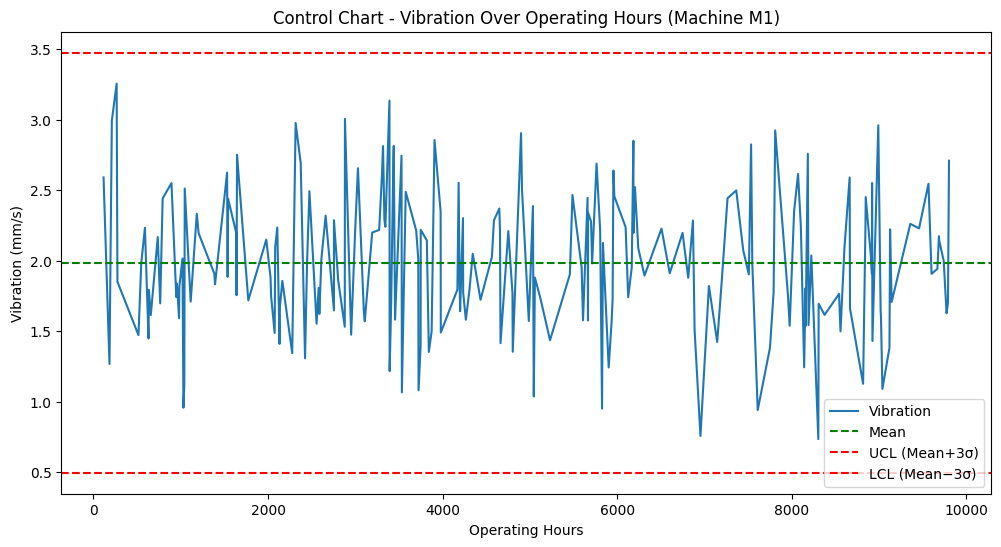

In [4]:
import matplotlib.pyplot as plt

sample = df[df['Machine_ID'] == 'M1'].sort_values('Operating_Hours')
vib = sample['Vibration_mm_s']

mean = vib.mean()
std = vib.std()
ucl = mean + 3 * std
lcl = mean - 3 * std

plt.figure(figsize=(12, 6))
plt.plot(sample['Operating_Hours'], vib, label='Vibration')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL (Mean+3σ)')
plt.axhline(lcl, color='red', linestyle='--', label='LCL (Mean−3σ)')
plt.title("Control Chart - Vibration Over Operating Hours (Machine M1)")
plt.xlabel("Operating Hours")
plt.ylabel("Vibration (mm/s)")
plt.legend()
plt.show()


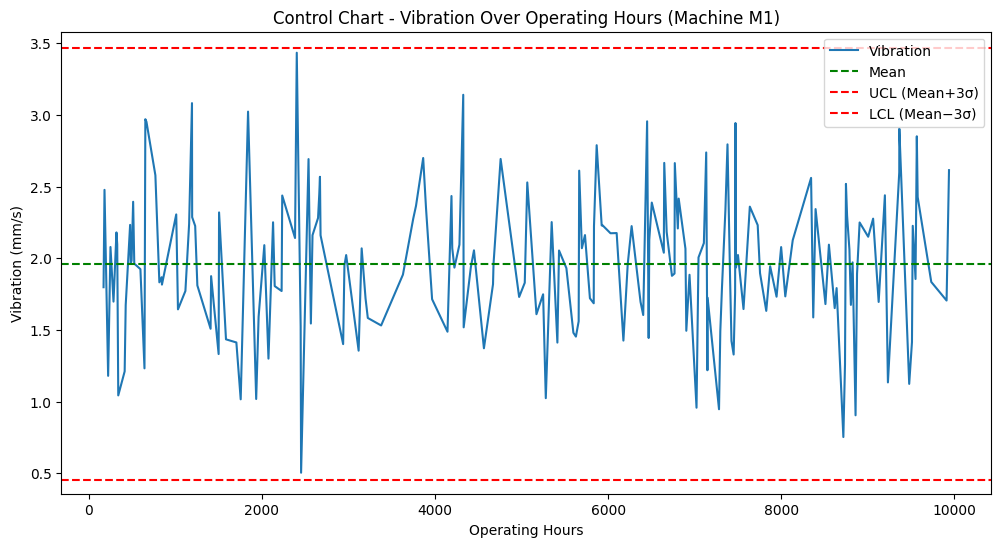

In [5]:
sample = df[df['Machine_ID'] == 'M2'].sort_values('Operating_Hours')
vib = sample['Vibration_mm_s']

mean = vib.mean()
std = vib.std()
ucl = mean + 3 * std
lcl = mean - 3 * std

plt.figure(figsize=(12, 6))
plt.plot(sample['Operating_Hours'], vib, label='Vibration')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL (Mean+3σ)')
plt.axhline(lcl, color='red', linestyle='--', label='LCL (Mean−3σ)')
plt.title("Control Chart - Vibration Over Operating Hours (Machine M1)")
plt.xlabel("Operating Hours")
plt.ylabel("Vibration (mm/s)")
plt.legend()
plt.show()


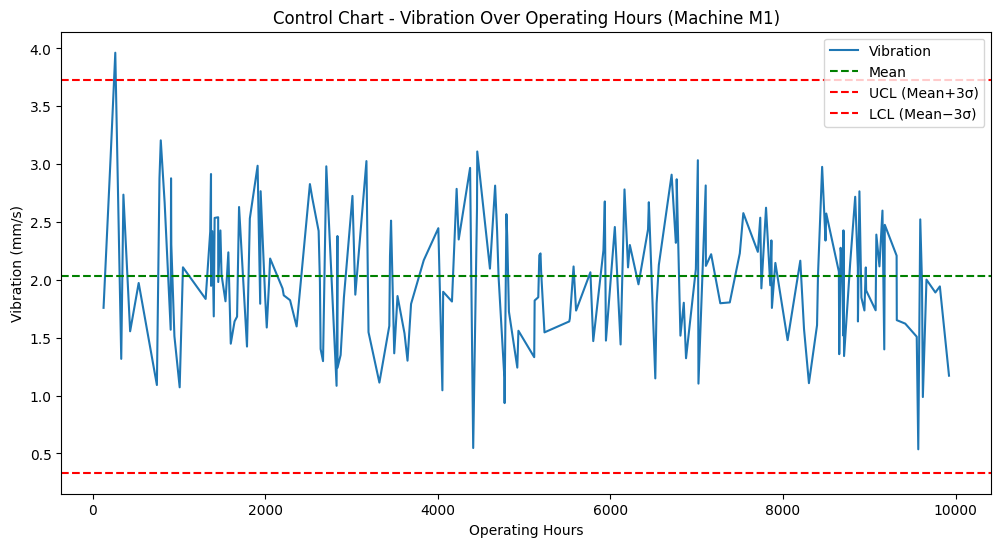

In [6]:
sample = df[df['Machine_ID'] == 'M3'].sort_values('Operating_Hours')
vib = sample['Vibration_mm_s']

mean = vib.mean()
std = vib.std()
ucl = mean + 3 * std
lcl = mean - 3 * std

plt.figure(figsize=(12, 6))
plt.plot(sample['Operating_Hours'], vib, label='Vibration')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL (Mean+3σ)')
plt.axhline(lcl, color='red', linestyle='--', label='LCL (Mean−3σ)')
plt.title("Control Chart - Vibration Over Operating Hours (Machine M1)")
plt.xlabel("Operating Hours")
plt.ylabel("Vibration (mm/s)")
plt.legend()
plt.show()


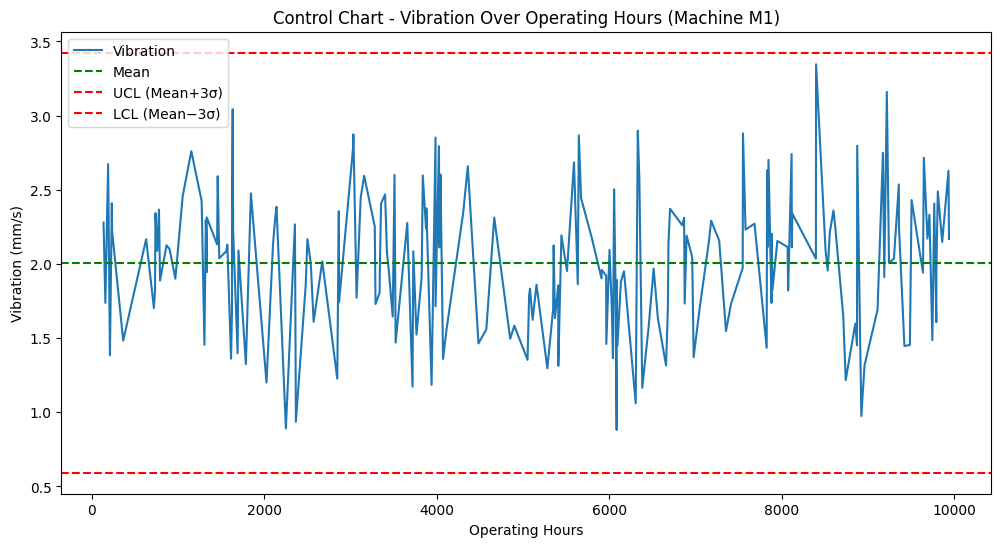

In [7]:
sample = df[df['Machine_ID'] == 'M4'].sort_values('Operating_Hours')
vib = sample['Vibration_mm_s']

mean = vib.mean()
std = vib.std()
ucl = mean + 3 * std
lcl = mean - 3 * std

plt.figure(figsize=(12, 6))
plt.plot(sample['Operating_Hours'], vib, label='Vibration')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL (Mean+3σ)')
plt.axhline(lcl, color='red', linestyle='--', label='LCL (Mean−3σ)')
plt.title("Control Chart - Vibration Over Operating Hours (Machine M1)")
plt.xlabel("Operating Hours")
plt.ylabel("Vibration (mm/s)")
plt.legend()
plt.show()


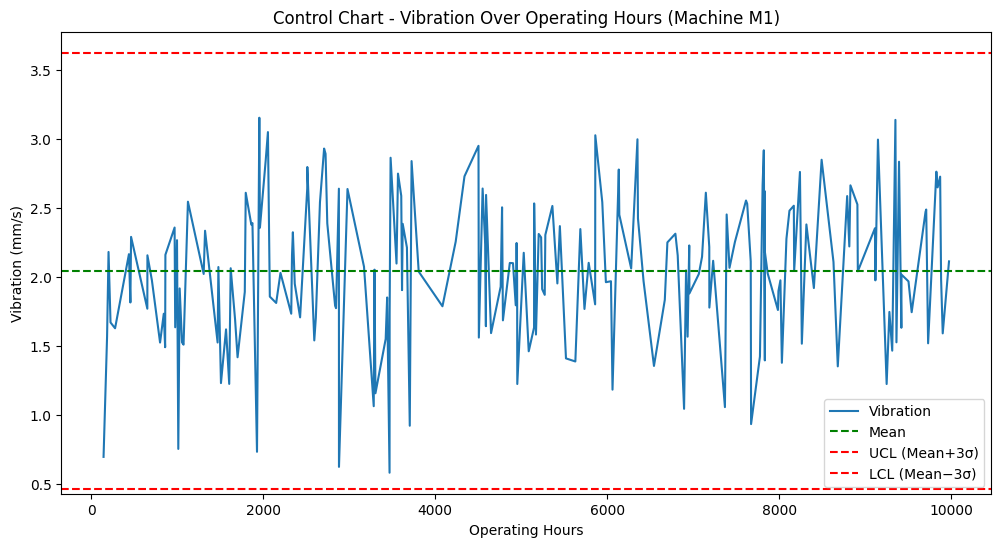

In [8]:
sample = df[df['Machine_ID'] == 'M5'].sort_values('Operating_Hours')
vib = sample['Vibration_mm_s']

mean = vib.mean()
std = vib.std()
ucl = mean + 3 * std
lcl = mean - 3 * std

plt.figure(figsize=(12, 6))
plt.plot(sample['Operating_Hours'], vib, label='Vibration')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL (Mean+3σ)')
plt.axhline(lcl, color='red', linestyle='--', label='LCL (Mean−3σ)')
plt.title("Control Chart - Vibration Over Operating Hours (Machine M1)")
plt.xlabel("Operating Hours")
plt.ylabel("Vibration (mm/s)")
plt.legend()
plt.show()
